In [ ]:
!unrar e '/content/drive/MyDrive/doodle/Doodle dataset.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/doodle/Doodle dataset.rar

Extracting  full_numpy_bitmap_airplane.npy                                 0%  1%  2%  3%  4%  5%  OK 
Extracting  full_numpy_bitmap_ant.npy                                      5%  6%  7%  8%  9%  OK 
Extracting  full_numpy_bitmap_banana.npy                                   9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19%  OK 
Extracting  full_numpy_bitmap_baseball.npy                                19% 20% 21% 22% 23% 24% 25%  OK 
Extracting  full_numpy_bitmap_bird.npy                                    25% 26% 27% 28% 29% 30%  OK 
Extracting  full_numpy_bitmap_bucket.npy                                  30% 31% 32% 33% 34%  OK 
Extracting  full_numpy_bitmap_butterfly.n

In [ ]:
!pip install ndjson

#Doodle claassifier 

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
import numpy as np
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader,random_split
import math
import matplotlib.pyplot as plt
from torch import optim  
from torch import nn 
import torch.nn.functional as F 
from tqdm import tqdm


In [ ]:
classes=('airplane','ant','banana','baseball','bird','bucket','butterfly','cat','coffee cup','dolphin','donut','duck','fish','leaf','mountain','pencil','smiley face','snake','umbrella','wine bottle')
print(len(classes))



20


In [ ]:
data=np.load('/content/drive/MyDrive/doodle/full_numpy_bitmap_airplane.npy')
n_samples=data.shape[0]
data=data.reshape(n_samples,1,28,28)
label=np.full((n_samples, 1), 0, dtype='uint8')
print(data.shape)
##loomp
for i in range(1,20):
  string='/content/drive/MyDrive/doodle/full_numpy_bitmap_'+classes[i]+'.npy'
  temp=np.load(string)
  n_samples=temp.shape[0]
  temp=temp.reshape(n_samples,1,28,28)
  temp_label=np.full((n_samples, 1), i, dtype='uint8')
  #print(temp.shape)
  label=np.concatenate((label,temp_label),axis=0)
  data=np.concatenate((data,temp),axis=0)
  print(data.shape)
print("label")
label=label.reshape(2807037)
print(label.shape)

(151623, 1, 28, 28)
(276235, 1, 28, 28)
(584171, 1, 28, 28)
(719546, 1, 28, 28)
(853118, 1, 28, 28)
(977182, 1, 28, 28)
(1095181, 1, 28, 28)
(1218383, 1, 28, 28)
(1401815, 1, 28, 28)
(1523428, 1, 28, 28)
(1664179, 1, 28, 28)
(1799659, 1, 28, 28)
(1933809, 1, 28, 28)
(2059380, 1, 28, 28)
(2187920, 1, 28, 28)
(2309921, 1, 28, 28)
(2434307, 1, 28, 28)
(2556580, 1, 28, 28)
(2680664, 1, 28, 28)
(2807037, 1, 28, 28)
label
(2807037,)


In [ ]:
class Doomdle(Dataset):
  def __init__(self,data,label):
    self.data_set= torch.from_numpy(data)
    self.y_labels= torch.from_numpy(label)
    self.n_samples=data.shape[0]


  def __getitem__(self, index):
        sample = self.data_set[index], self.y_labels[index]
        return sample

  def __len__(self):
        return self.n_samples

data_sets=Doomdle(data,label)
first_data = data_sets[0]
features, labels = first_data
print(len(data_sets))
print(features.shape, labels)
#print(classes[labels])


#shuffled_data=DataLoader(dataset=data_sets,batch_size=,shuffle=True,num_workers=2)

#print(len(shuffled_data))
#dataiter = iter(shuffled_data)
#print(len(dataiter)
#features, labels = dataq
#print(features.shape, labels[0])
#features=np.array(features)
#print(classes[labels[0]])
#plt.imshow(features[0],cmap = 'gray')






2807037
torch.Size([1, 28, 28]) tensor(0, dtype=torch.uint8)


In [ ]:
train_size = int(0.7 * len(data_sets))
vald_size=int(0.1 * len(data_sets))
test_size = len(data_sets) - train_size-vald_size
train_dataset, vald_dataset, test_dataset =random_split(data_sets, [train_size,vald_size ,test_size])


#first_data = train_dataset[0]
#features, labels = first_data
#print(len(data_sets))
#print(features.shape, labels)
#print(classes[labels])
#features=np.array(features)

#plt.imshow(features,cmap = 'gray')
#plt.show()
train_dataset=DataLoader(dataset=train_dataset,batch_size=2048,shuffle=True,num_workers=2)
vald_dataset=DataLoader(dataset=vald_dataset,batch_size=2048,num_workers=2)
test_dataset=DataLoader(dataset=test_dataset,batch_size=2048,num_workers=2)
print(len(train_dataset))
#print(len(shuffled_data))

960


Epoch [1/10], Step [1/960], Loss: 5.9988
Epoch [1/10], Step [100/960], Loss: 1.2565
Epoch [1/10], Step [200/960], Loss: 0.9854
Epoch [1/10], Step [300/960], Loss: 0.8839
Epoch [1/10], Step [400/960], Loss: 0.8656
Epoch [1/10], Step [500/960], Loss: 0.8032
Epoch [1/10], Step [600/960], Loss: 0.7152
Epoch [1/10], Step [700/960], Loss: 0.7238
Epoch [1/10], Step [800/960], Loss: 0.7339
Epoch [1/10], Step [900/960], Loss: 0.6574
Epoch [2/10], Step [1/960], Loss: 0.7334
Epoch [2/10], Step [100/960], Loss: 0.7022
Epoch [2/10], Step [200/960], Loss: 0.6826
Epoch [2/10], Step [300/960], Loss: 0.6899
Epoch [2/10], Step [400/960], Loss: 0.6849
Epoch [2/10], Step [500/960], Loss: 0.6313
Epoch [2/10], Step [600/960], Loss: 0.6260
Epoch [2/10], Step [700/960], Loss: 0.6400
Epoch [2/10], Step [800/960], Loss: 0.6590
Epoch [2/10], Step [900/960], Loss: 0.6095
Epoch [3/10], Step [1/960], Loss: 0.6088
Epoch [3/10], Step [100/960], Loss: 0.6507
Epoch [3/10], Step [200/960], Loss: 0.6303
Epoch [3/10], Ste

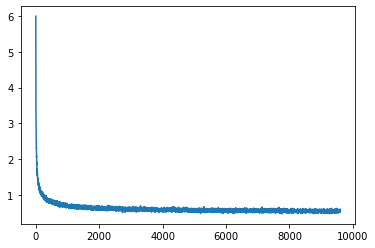

In [ ]:
class CNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels,4,3,stride=1,padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.dropout=nn.Dropout()
        self.conv2 = nn.Conv2d(4,8,3,stride=1,padding=1 )
        self.fc1 = nn.Linear(8 * 7 * 7, 150)
        self.fc2 = nn.Linear(150, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        #x = torch.flatten(x, 1)
        x=x.view(-1,8*7*7)
        x=self.dropout(x)
        x = F.relu(self.fc1(x))
        x=self.fc2(x)

        return x

in_channels = 1
num_classes = 20
learning_rate = 0.001
batch_size = 2048
num_epochs = 10


model=CNN(in_channels, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
n_total_steps = len(train_dataset)
co=[]
for epoch in range(num_epochs):
    for batch_idx, (data1, targets) in enumerate((train_dataset)):
      
      data1=data1.to(device)
      targets=targets.to(device)
      scores = model(data1.float())
      targets = targets.type(torch.LongTensor)
      loss = criterion(scores, targets)

      optimizer.zero_grad()
      loss.backward()

        
      optimizer.step()
      if (batch_idx==0):
         print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{n_total_steps}], Loss: {loss.item():.4f}')
      if (batch_idx+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{n_total_steps}], Loss: {loss.item():.4f}')
      co.append(loss.item())
plt.plot(co)  




In [ ]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    
    with torch.no_grad():
        for x, y in loader:
          x=x.to(device)
          y=y.to(device)
          x = x.type(torch.LongTensor)
          y = y.type(torch.LongTensor)
          scores = model(x.float())
          _, predictions = torch.max(scores.data, 1)
          num_correct += (predictions == y).sum()
          num_samples += predictions.size(0)


    model.train()
    return num_correct/num_samples


print(f"Accuracy on training set: {check_accuracy(train_dataset, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_dataset, model)*100:.2f}")

Accuracy on training set: 90.18
Accuracy on test set: 89.67


In [ ]:
print(f"Accuracy on test set: {check_accuracy(vald_dataset, model)*100:.2f}")

Accuracy on test set: 85.14


In [ ]:
#saving model
FILE = "model.pth"
torch.save(model.state_dict(), FILE)


In [ ]:
#loading model for evalution 
FILE = "model1.pth"
loaded_model = CNN(in_channels, num_classes)
loaded_model.load_state_dict(torch.load(FILE)) # it takes the loaded dictionary, not the path file itself
loaded_model.eval()



CNN(
  (conv1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=392, out_features=150, bias=True)
  (fc2): Linear(in_features=150, out_features=20, bias=True)
)

it's a  airplane


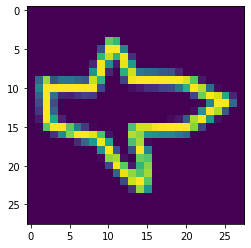

In [ ]:
#testing
i=np.random.randint(1,train_size)
img=torch.tensor(data[i]).to(device).float()
img=img.reshape(1,1,28,28)
l=label[i]
res=loaded_model(img)
i=torch.argmax(res)


plt.imshow(img.to('cpu').detach().numpy().reshape(28,28))
print("it's a ",classes[i.item()])